In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [131]:
for dirname, _, filenames in os.walk('./titanic_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./titanic_data/my_submission.csv
./titanic_data/test.csv
./titanic_data/train.csv
./titanic_data/gender_submission.csv


In [132]:
train_data = pd.read_csv('./titanic_data/train.csv')
test_data = pd.read_csv('./titanic_data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

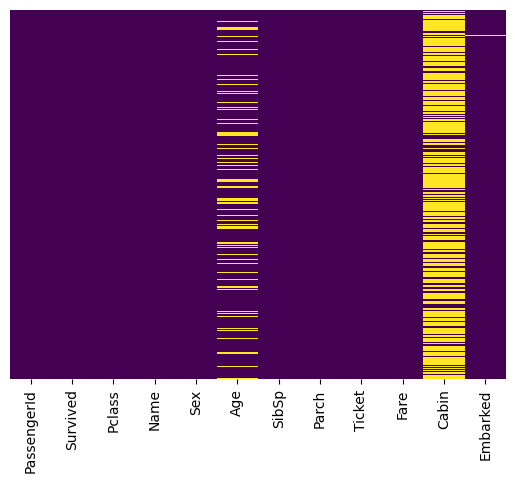

In [133]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [134]:
train_data.drop('Cabin', axis=1, inplace=True)

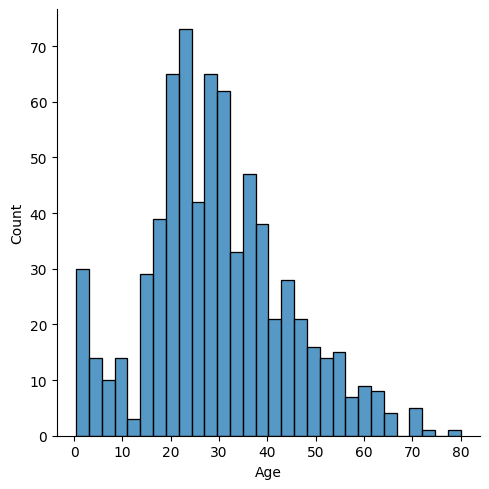

In [135]:
sns.displot(train_data['Age'].dropna(), kde=False, bins=30)

/var/folders/6x/ffk1ml0n4xg1h9xcjg_gk_pc0000gn/T/ipykernel_2786/2729178439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train_data, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

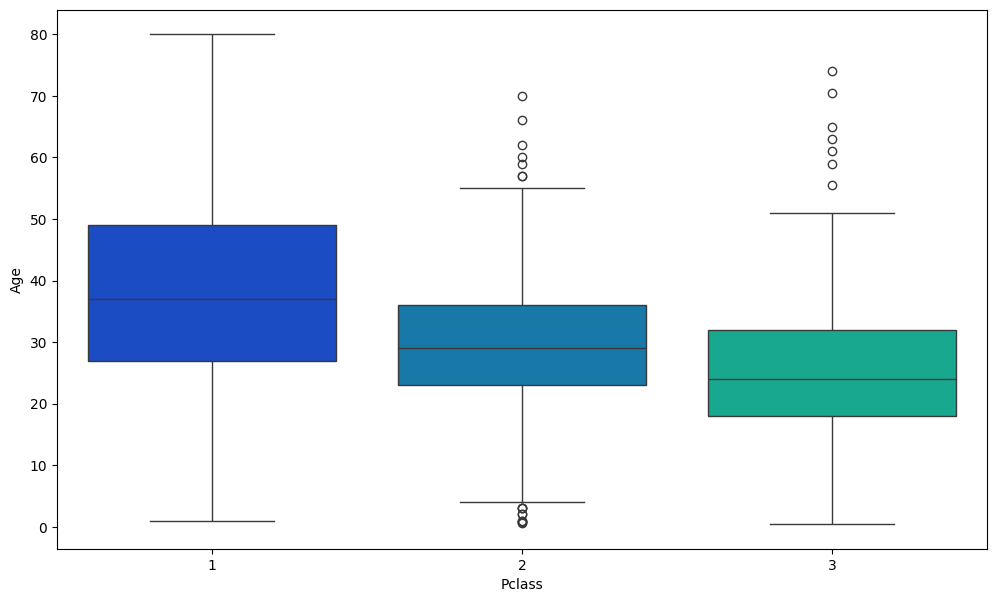

In [136]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train_data, palette='winter')

In [137]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [138]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age, axis=1)
train_data.head()

/var/folders/6x/ffk1ml0n4xg1h9xcjg_gk_pc0000gn/T/ipykernel_2786/3674849426.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age= cols[0]
/var/folders/6x/ffk1ml0n4xg1h9xcjg_gk_pc0000gn/T/ipykernel_2786/3674849426.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass= cols[1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

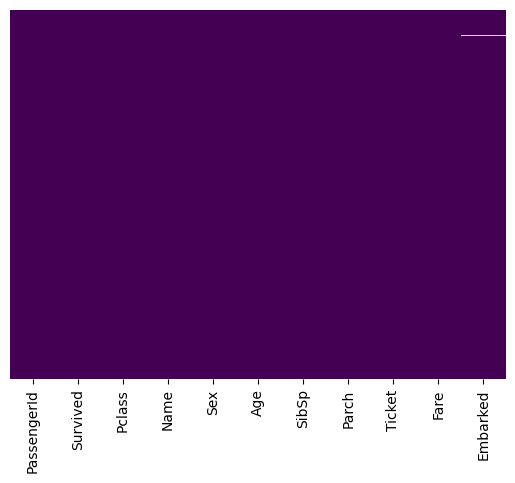

In [139]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

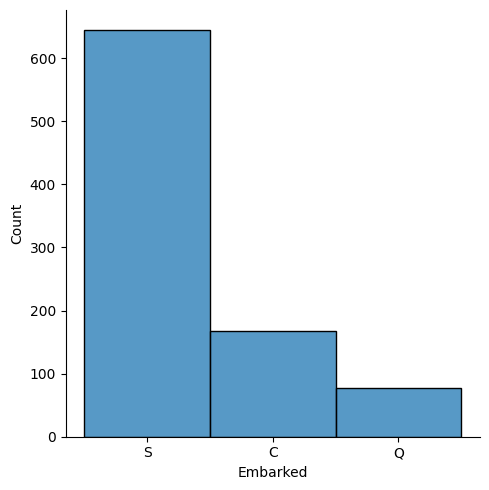

In [140]:
sns.displot(train_data['Embarked'].dropna(), kde=False, bins=30)

/var/folders/6x/ffk1ml0n4xg1h9xcjg_gk_pc0000gn/T/ipykernel_2786/4222133380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna('S', inplace=True)


<Axes: >

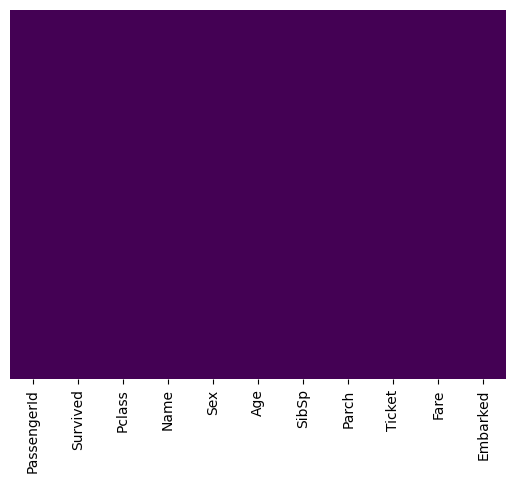

In [141]:
train_data['Embarked'].fillna('S', inplace=True)
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [142]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [143]:
sex = pd.get_dummies(train_data['Sex'], drop_first=True)
embarked = pd.get_dummies(train_data['Embarked'], drop_first=True)

In [144]:
train_data.drop(['Sex', 'Ticket', 'Name', 'PassengerId','Embarked'], axis=1, inplace=True)

In [145]:
train_data = pd.concat([train_data,sex, embarked], axis=1)
train_data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
5,0,3,24.0,0,0,8.4583,True,True,False
6,0,1,54.0,0,0,51.8625,True,False,True
7,0,3,2.0,3,1,21.0750,True,False,True
8,1,3,27.0,0,2,11.1333,False,False,True
9,1,2,14.0,1,0,30.0708,False,False,False


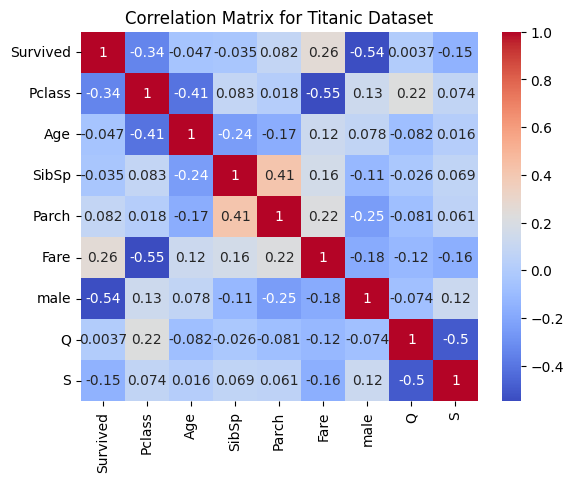

In [147]:
corr = train_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Titanic Dataset')
plt.show()

In [149]:
family = train_data['SibSp'] + train_data['Parch']
train_data['Family'] = family
train_data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Family
0,0,3,22.0,1,0,7.2500,True,False,True,1
1,1,1,38.0,1,0,71.2833,False,False,False,1
2,1,3,26.0,0,0,7.9250,False,False,True,0
3,1,1,35.0,1,0,53.1000,False,False,True,1
4,0,3,35.0,0,0,8.0500,True,False,True,0
5,0,3,24.0,0,0,8.4583,True,True,False,0
6,0,1,54.0,0,0,51.8625,True,False,True,0
7,0,3,2.0,3,1,21.0750,True,False,True,4
8,1,3,27.0,0,2,11.1333,False,False,True,2
9,1,2,14.0,1,0,30.0708,False,False,False,1
